In [2]:
import numpy as np
# from segment_anything import SamPredictor, sam_model_registry
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import matplotlib.pyplot as plt
from PIL import Image




In [3]:
device = "cpu"
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [4]:
img = np.load('data/cubemap/R.npy')
img = np.concatenate((img,img,img), axis=2)
print(img.shape)
img = Image.fromarray(img).resize((743,743),Image.BICUBIC)
img.save('ar.png')
img = np.array(img)
print(img.size)

(2972, 2972, 3)
1656147


In [19]:
masks = mask_generator.generate(img)


In [20]:
print(len(masks))
print(masks[0].keys())

60
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [21]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

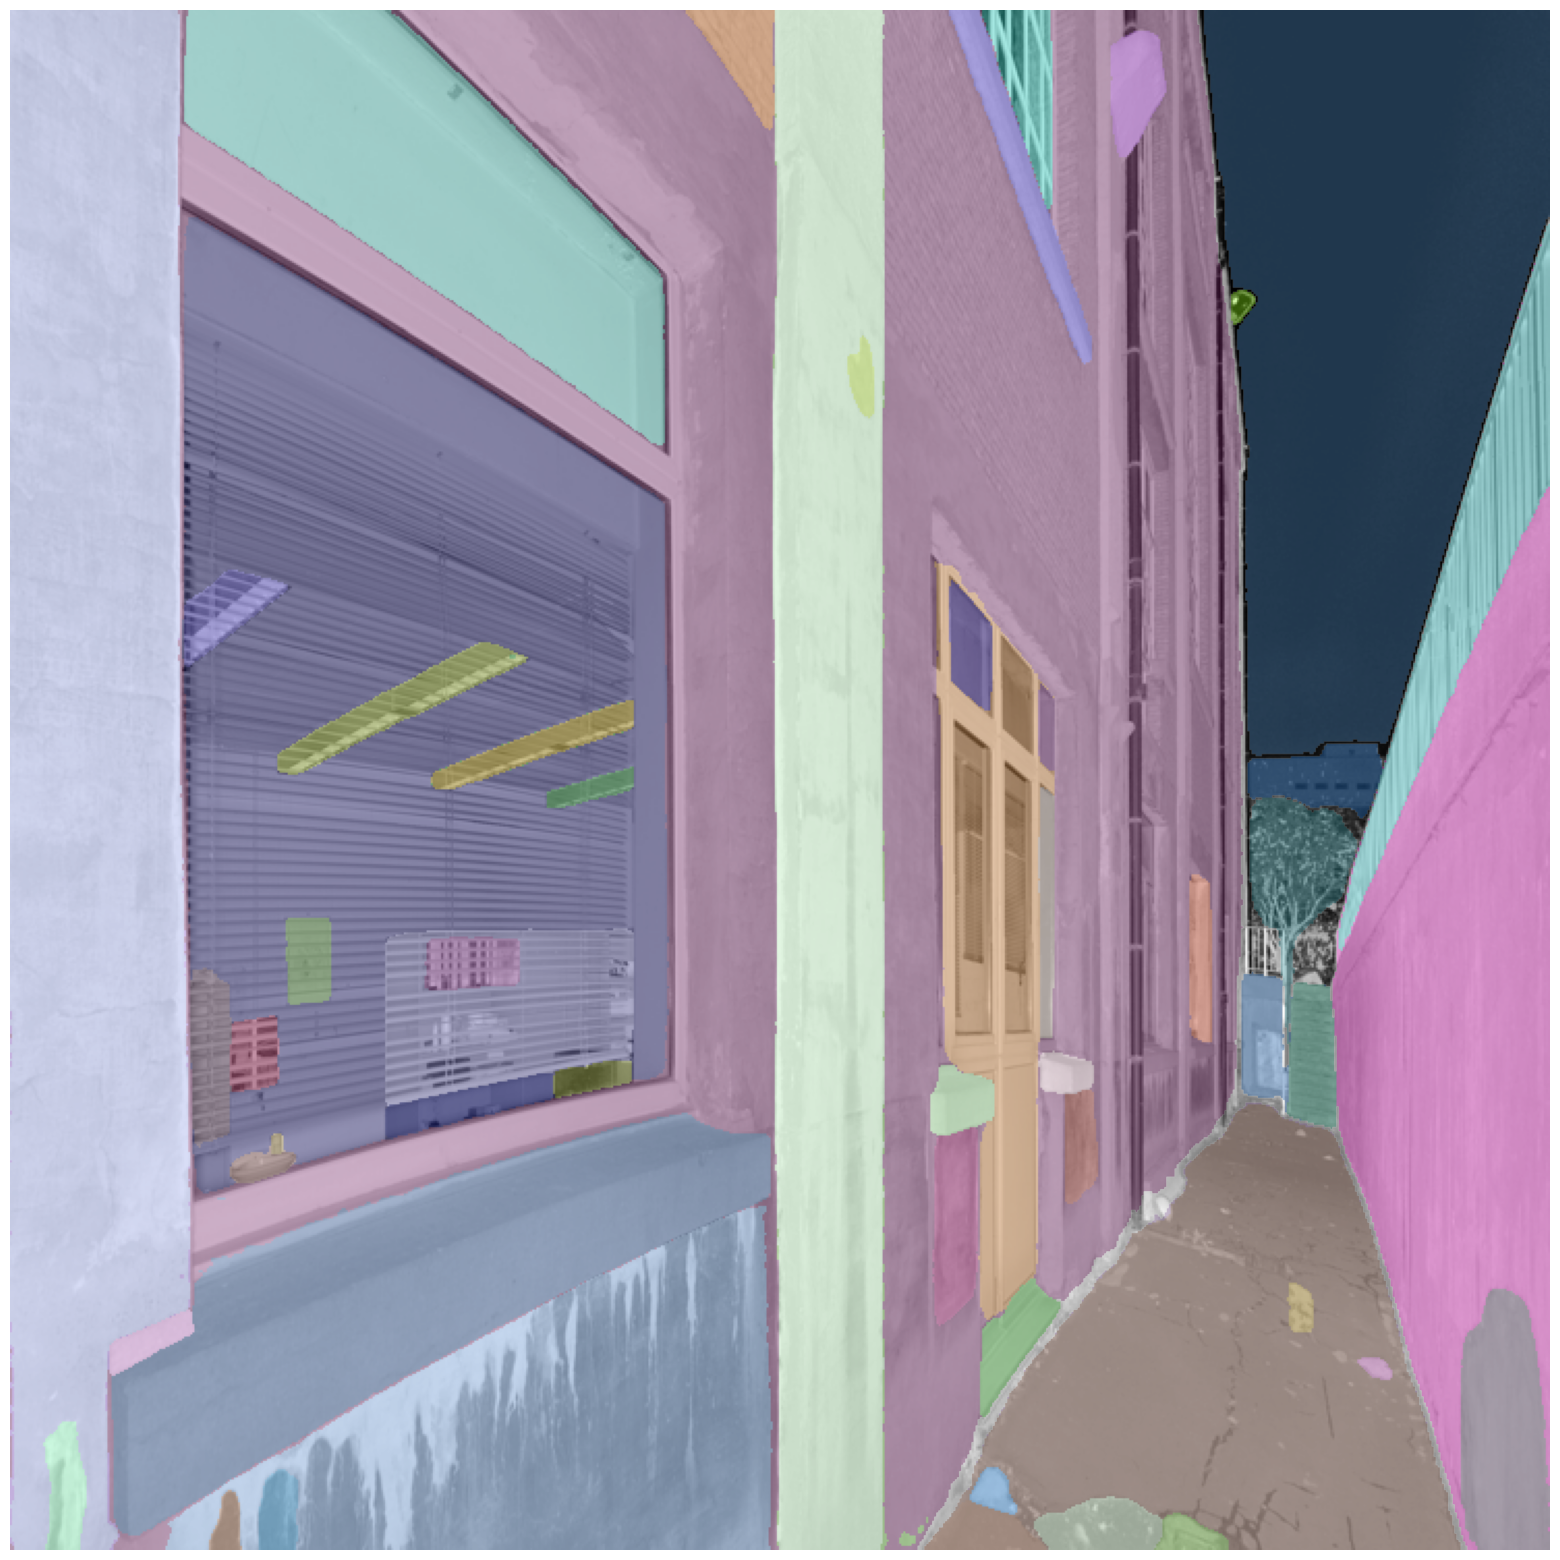

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(img)
show_anns(masks)
plt.axis('off')
plt.show() 

In [34]:
for f in masks:
    print(f['area'], f['predicted_iou'], f['stability_score'])

6712699 1.046345591545105 0.9963271021842957
674831 1.0312575101852417 0.9929447770118713
698880 1.0199508666992188 0.9908384084701538
449649 1.012869954109192 0.9711846709251404
533798 1.0091995000839233 0.9805617332458496
355414 1.008159875869751 0.978922426700592
537117 1.007154107093811 0.979218602180481
1388987 1.0002894401550293 0.973534345626831
118068 0.9920287728309631 0.9787813425064087
228240 0.9870684146881104 0.9645906090736389
31754 0.9860528707504272 0.9751601219177246
9468 0.982831597328186 0.9778798222541809
28502 0.9821991324424744 0.9779582619667053
72506 0.9811009168624878 0.9645032286643982
18687 0.9800170063972473 0.9736995100975037
15331 0.9799907803535461 0.9786175489425659
5115 0.9799787402153015 0.9889191389083862
19252 0.9706624746322632 0.9768062233924866
13142 0.9690766930580139 0.9826506972312927
25561 0.9667755365371704 0.9664718508720398
6807 0.9640321135520935 0.9828188419342041
618494 0.9638137817382812 0.9696373343467712
34040 0.9626352787017822 0.963